In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from utils import exec_query
from queries import QUERY_ALL_POKEMON
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import plotly.graph_objects as make_subplots
import plotly.graph_objects as go

In [2]:
N_MAX_CLUSTERS = 20
n_choosed_clusters = 3
cols = ['hp', 'atk', 'def', 'spa', 'spd', 'spe']

In [3]:
def get_stats_list_by_number():
    records, summary, keys = exec_query(QUERY_ALL_POKEMON, {})
    stats = []
    names = []
    for record in records:
        stats.append([record['p']['hp'], record['p']['atk'], record['p']['def'], record['p']['spa'], record['p']['spd'], record['p']['spe']])
        names.append(record['p']['name'])
    return stats, names

def elbow_method(data):
    score = []
    for i in range(1, N_MAX_CLUSTERS): 
        model = KMeans(n_clusters=i, random_state=42)
        model.fit(data)
        score.append(model.inertia_)
    
    plt.plot(range(1, N_MAX_CLUSTERS), score)
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

In [4]:
X, names = get_stats_list_by_number()

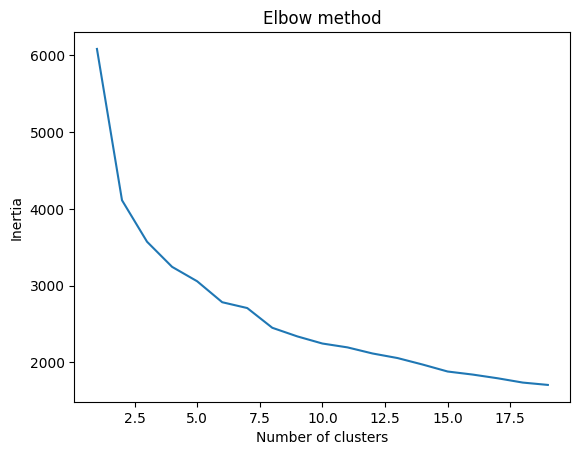

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

elbow_method(X)

In [6]:
model = KMeans(n_clusters=n_choosed_clusters, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

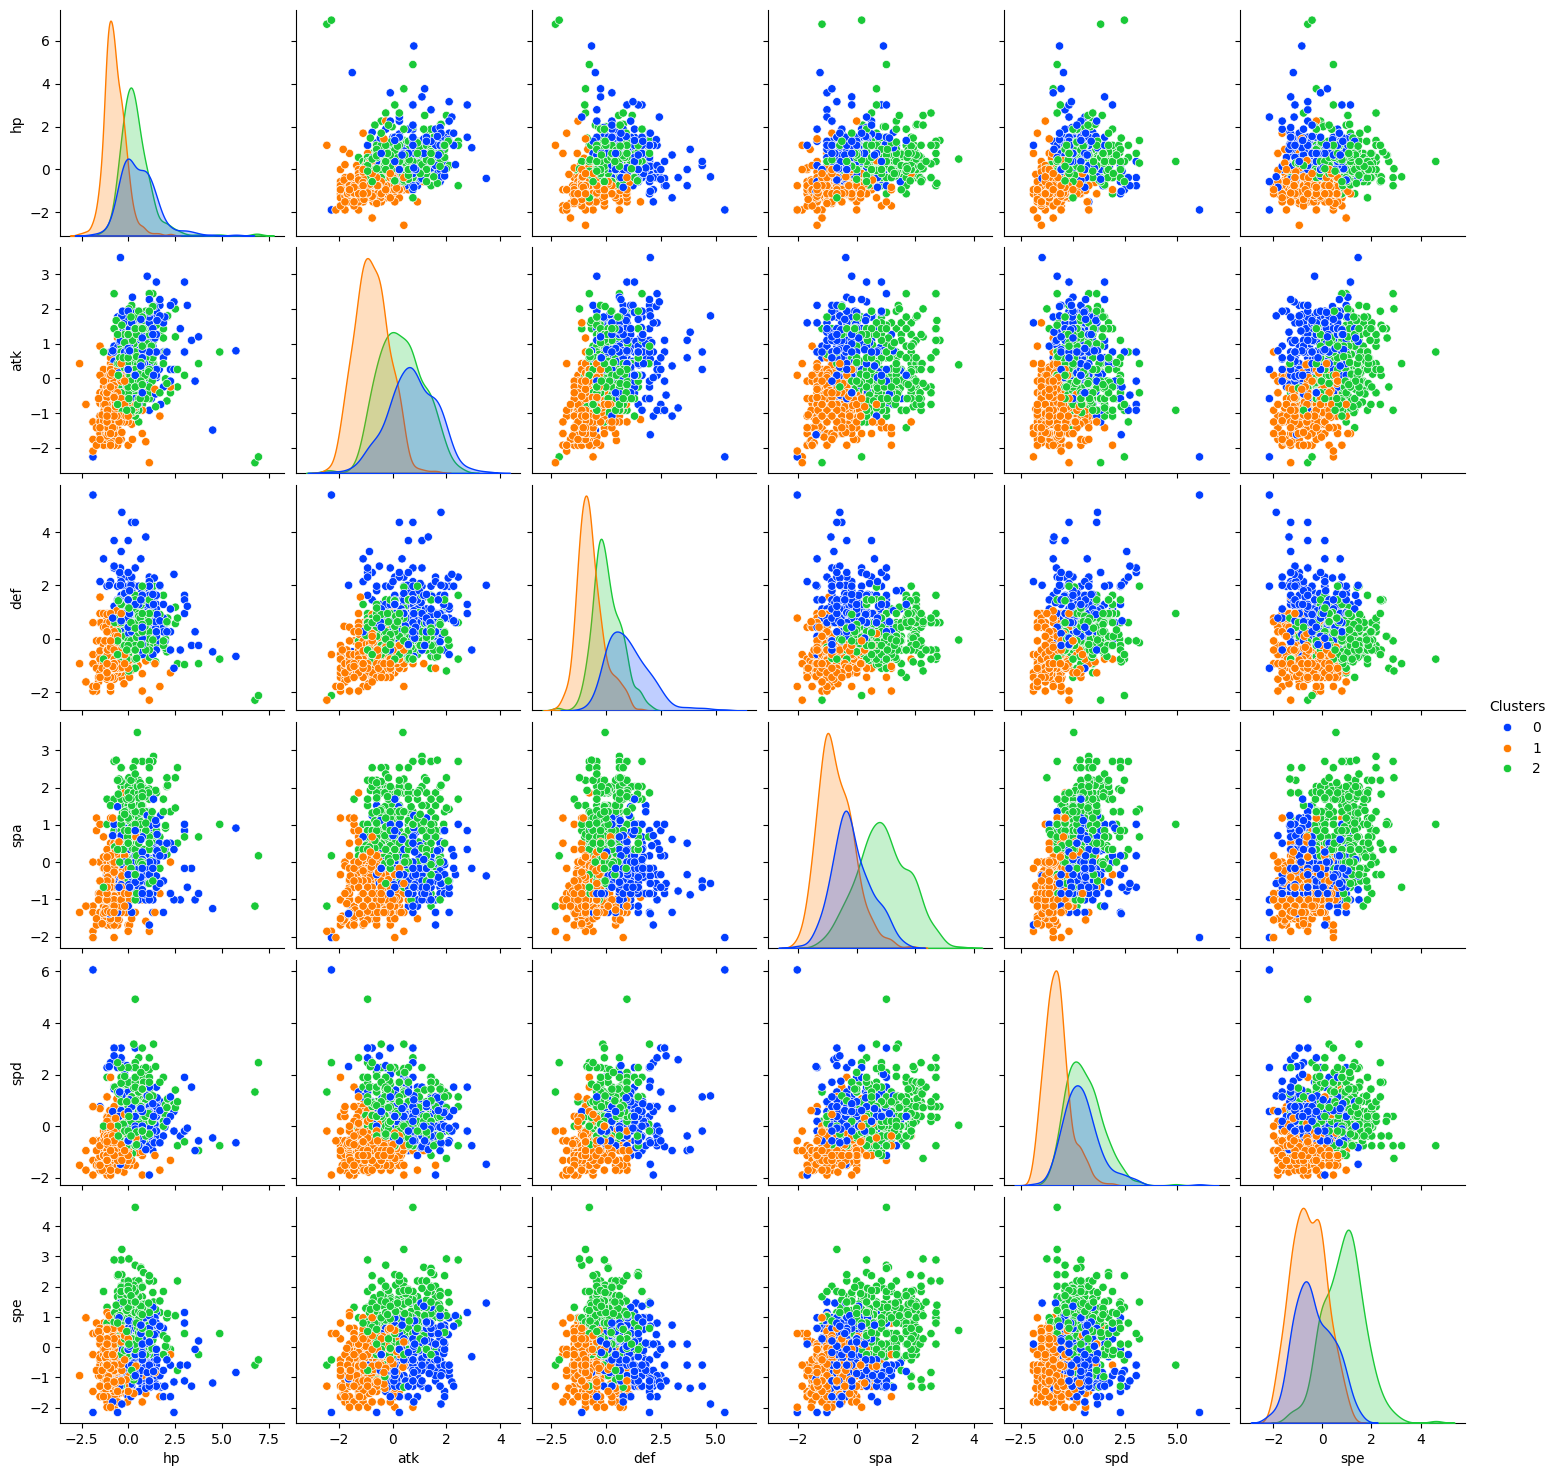

,hp,atk,def,spa,spd,spe,Clusters
0,85,98,101,65,81,57,0
1,50,54,51,49,49,51,1
2,80,86,73,96,84,92,2


In [7]:
# Visualize the clusters
X = pd.DataFrame(X, columns=cols)
X['Clusters'] = model.labels_

centroides = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_))
centroides.columns = cols
centroides["Clusters"] = range(n_choosed_clusters)

sns.pairplot(X, hue="Clusters", palette="bright")
plt.show()

clustered_pokemons = X.groupby(["Clusters"])
centroides.astype(int)

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

rows = 3
columns = n_choosed_clusters // 2

fig = make_subplots(
    rows=rows,
    cols=columns,
    specs=[
        [{"type": "polar"} for i in range(columns)] for j in range(rows)
    ],
    subplot_titles=[f"Cluster {i}" for i in range(n_choosed_clusters)],
)
for i in range(rows):
    for j in range(columns):
        if i * columns + j >= n_choosed_clusters:
            break
        fig.add_trace(
            go.Scatterpolar(
                r=centroides.iloc[i].values,
                theta=cols,
                fill="toself",
                name=f"Cluster {i}",
            ),
            row=i + 1,
            col=j + 1
        )
        
fig.update_polars(
    radialaxis=dict(visible=True, range=[0, 150]),
    angularaxis=dict(showline=True, showticklabels=True),
)

fig.show()

In [10]:
# Radar chart with all clusters in the same plot
fig = go.Figure()

for i in range(rows):
    fig.add_trace(
        go.Scatterpolar(
            r=centroides.iloc[i].values,
            theta=cols,
            fill="toself",
            name=f"Cluster {i}",
        ),
    )
        
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 150]),
        angularaxis=dict(showline=True, showticklabels=True),
    )
)

fig.show()



In [29]:
# which pokemons are in each cluster
for cluster, pokemons in clustered_pokemons:
    print(f"Cluster {cluster}")
    for i in pokemons.index:
        print(names[i], end=", ")
    print()

Cluster (0,)
Sandslash, Nidoqueen, Parasect, Poliwrath, Machoke, Machamp, Graveler, Golem, Slowbro, Dewgong, Muk, Cloyster, Onix, Kingler, Marowak, Hitmonchan, Lickitung, Weezing, Rhydon, Tangela, Kangaskhan, Seaking, Pinsir, Tauros, Gyarados, Lapras, Omastar, Kabutops, Snorlax, Croconaw, Feraligatr, Ariados, Togetic, Bellossom, Azumarill, Sudowoodo, Quagsire, Umbreon, Slowking, Wobbuffet, Forretress, Dunsparce, Gligar, Steelix, Granbull, Qwilfish, Scizor, Shuckle, Heracross, Ursaring, Magcargo, Piloswine, Corsola, Octillery, Skarmory, Donphan, Hitmontop, Miltank, Pupitar, Tyranitar, Marshtomp, Swampert, Mightyena, Breloom, Slaking, Hariyama, Nosepass, Lairon, Aggron, Swalot, Camerupt, Torkoal, Solrock, Whiscash, Crawdaunt, Claydol, Cradily, Armaldo, Kecleon, Dusclops, Tropius, Sealeo, Huntail, Gorebyss, Relicanth, Shelgon, Metang, Metagross, Regirock, Registeel, Groudon, Grotle, Torterra, Rampardos, Bastiodon, Wormadam, Vespiquen, Gastrodon, Bronzong, Spiritomb, Munchlax, Hippowdon, D